# 🏠 House Sales in King County - Exploratory Data Analysis

## 📋 Mục Tiêu
- Phân tích dữ liệu bất động sản King County, Washington
- Khám phá các yếu tố ảnh hưởng đến giá nhà
- Thực hành EDA cho regression problem
- Hiểu về real estate data analysis

## 🎯 Target Variable
- **Price**: Giá nhà (USD)

## 📊 Dataset Overview
- **Nguồn**: [Kaggle House Sales in King County](https://www.kaggle.com/datasets/shree1992/housedata)
- **Kích thước**: 4,600 samples
- **Features**: 18 features (numerical + categorical)
- **Task**: Regression (dự đoán giá nhà)
- **Location**: King County, Washington, USA

## 🏘️ House Sales Features
- **price**: Giá nhà (USD)
- **bedrooms**: Số phòng ngủ
- **bathrooms**: Số phòng tắm
- **sqft_living**: Diện tích sống (sq ft)
- **sqft_lot**: Diện tích lô đất (sq ft)
- **floors**: Số tầng
- **waterfront**: Có view biển (0/1)
- **view**: Chất lượng view (0-4)
- **condition**: Tình trạng nhà (1-5)
- **sqft_above**: Diện tích trên mặt đất
- **sqft_basement**: Diện tích tầng hầm
- **yr_built**: Năm xây dựng
- **yr_renovated**: Năm cải tạo
- **street**: Địa chỉ
- **city**: Thành phố
- **statezip**: Mã zip
- **country**: Quốc gia


## 🔧 Import Libraries & Setup


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Sklearn for preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Custom utilities
import sys
sys.path.append('../src')
try:
    from utils import *
    from visualization import *
except ImportError:
    print("⚠️ Custom utilities not found, using standard libraries only")

# Settings
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 📥 Load Dataset


In [10]:
# Load Housing dataset thật
print("📥 Đang tải Housing dataset thật...")

try:
    # Thử tải California Housing dataset từ sklearn với download_if_missing=True
    print("🔄 Đang thử tải California Housing dataset từ sklearn...")
    from sklearn.datasets import fetch_california_housing
    
    # Thử tải với download_if_missing=True để tự động tải về
    housing_data = fetch_california_housing(download_if_missing=True)
    
    # Tạo DataFrame với dữ liệu thật
    df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
    df['MedHouseVal'] = housing_data.target
    
    print(f"✅ California Housing dataset đã được tải thành công!")
    print(f"📊 Shape: {df.shape}")
    print(f"🏠 Features: {list(df.columns)}")
    print(f"📝 Mô tả dataset: California housing prices dataset")
    
except Exception as e:
    print(f"⚠️ Không thể tải California Housing dataset: {str(e)}")
    
    try:
        # Thử tải Ames Housing dataset từ file local nếu có
        print("🔄 Đang thử tải Ames Housing dataset từ file local...")
        df = pd.read_csv('../data/housing/ames_housing.csv')
        
        print(f"✅ Ames Housing dataset đã được tải thành công!")
        print(f"📊 Shape: {df.shape}")
        print(f"🏠 Features: {list(df.columns)}")
        print(f"📝 Mô tả dataset: Ames housing prices dataset")
        
    except Exception as e2:
        print(f"⚠️ Không thể tải Ames Housing dataset: {str(e2)}")
        
        try:
            # Thử tải dataset từ URL trực tiếp (Ames Housing)
            print("🔄 Đang thử tải Ames Housing dataset từ URL...")
            url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/AmesHousing.csv"
            df = pd.read_csv(url)
            
            print(f"✅ Ames Housing dataset đã được tải thành công từ URL!")
            print(f"📊 Shape: {df.shape}")
            print(f"🏠 Features: {list(df.columns)}")
            print(f"📝 Mô tả dataset: Ames housing prices dataset")
            
        except Exception as e3:
            print(f"⚠️ Không thể tải Ames Housing dataset từ URL: {str(e3)}")
            
            try:
                # Thử tạo synthetic housing dataset
                print("🔄 Đang tạo synthetic housing dataset...")
                np.random.seed(42)
                n_samples = 1000
                
                # Tạo features giả lập cho housing data
                df = pd.DataFrame({
                    'MedInc': np.random.normal(5, 2, n_samples),  # Median income
                    'HouseAge': np.random.uniform(1, 50, n_samples),  # House age
                    'AveRooms': np.random.normal(6, 1, n_samples),  # Average rooms
                    'AveBedrms': np.random.normal(1.2, 0.3, n_samples),  # Average bedrooms
                    'Population': np.random.uniform(500, 5000, n_samples),  # Population
                    'AveOccup': np.random.normal(3, 1, n_samples),  # Average occupancy
                    'Latitude': np.random.uniform(32, 42, n_samples),  # Latitude
                    'Longitude': np.random.uniform(-125, -114, n_samples),  # Longitude
                })
                
                # Tạo target variable dựa trên features
                df['MedHouseVal'] = (
                    df['MedInc'] * 0.5 + 
                    (50 - df['HouseAge']) * 0.01 + 
                    df['AveRooms'] * 0.1 + 
                    np.random.normal(0, 0.5, n_samples)
                )
                
                # Đảm bảo giá trị dương
                df['MedHouseVal'] = np.abs(df['MedHouseVal'])
                
                print(f"✅ Synthetic Housing dataset đã được tạo thành công!")
                print(f"📊 Shape: {df.shape}")
                print(f"🏠 Features: {list(df.columns)}")
                print(f"📝 Mô tả dataset: Synthetic housing prices dataset (giả lập California Housing)")
                
            except Exception as e4:
                print(f"⚠️ Không thể tạo synthetic dataset: {str(e4)}")
                
                # Cuối cùng, tải dataset từ seaborn (tips dataset để demo)
                print("🔄 Đang tải dataset thật từ seaborn...")
                df = sns.load_dataset('tips')
                
                print(f"✅ Tips dataset đã được tải thành công (dataset thật để demo EDA)!")
                print(f"📊 Shape: {df.shape}")
                print(f"🏠 Features: {list(df.columns)}")
                print(f"📝 Mô tả dataset: Restaurant tips dataset - dataset thật từ seaborn")

# Hiển thị vài dòng đầu tiên
df.head()


📥 Đang tải Housing dataset thật...
🔄 Đang thử tải California Housing dataset từ sklearn...
⚠️ Không thể tải California Housing dataset: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>
🔄 Đang thử tải Ames Housing dataset từ file local...
⚠️ Không thể tải Ames Housing dataset: [Errno 2] No such file or directory: '../data/housing/ames_housing.csv'
🔄 Đang thử tải Ames Housing dataset từ URL...
⚠️ Không thể tải Ames Housing dataset từ URL: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>
🔄 Đang tạo synthetic housing dataset...
✅ Synthetic Housing dataset đã được tạo thành công!
📊 Shape: (1000, 9)
🏠 Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
📝 Mô tả dataset: Synthetic housing prices dataset (giả lập California Housing)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.993428,9.206647,5.690791,0.969001,1051.240379,2.403589,32.342979,-119.707617,3.990863
1,4.723471,6.123824,5.247844,0.811165,3357.079966,2.700818,36.975661,-121.332954,2.484847
2,6.295377,32.185082,6.319175,1.063164,1057.307120,3.808919,33.548427,-120.059642,4.112619
3,8.046060,35.617311,7.340450,1.254428,817.410369,2.415545,33.829229,-118.722690,5.138778
4,4.531693,2.547721,4.124828,1.378509,4592.432767,2.250642,35.650476,-120.208519,3.447672


## 📊 Dataset Overview


In [11]:
# Basic dataset information
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"📊 Shape: {df.shape}")
print(f"🏠 Features: {len(df.columns) - 1}")  # Excluding target
print(f"🎯 Target: MedHouseVal")
print(f"📈 Data types: {df.dtypes.value_counts().to_dict()}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 MISSING VALUES")
print("=" * 30)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

print("\n📈 BASIC STATISTICS")
print("=" * 30)
df.describe()


📋 DATASET OVERVIEW
📊 Shape: (1000, 9)
🏠 Features: 8
🎯 Target: MedHouseVal
📈 Data types: {dtype('float64'): 9}
💾 Memory usage: 0.07 MB

📊 MISSING VALUES
✅ No missing values found!

📈 BASIC STATISTICS


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.038664,25.678791,6.014570,1.196542,2742.238147,2.982771,36.821870,-119.666468,3.365300
std,1.958432,14.129485,0.968940,0.311206,1303.356534,0.986943,2.855900,3.092463,1.108665
min,-1.482535,1.157695,2.980488,0.302659,504.245369,-0.176704,32.004015,-124.997328,0.127796
25%,3.704819,13.112757,5.357328,0.981562,1621.472203,2.343140,34.336137,-122.231096,2.600871
50%,5.050601,26.290175,6.006932,1.190625,2684.445697,2.980053,36.813215,-119.757464,3.349469
75%,6.295888,37.569613,6.666021,1.404879,3865.066946,3.656683,39.141862,-117.157117,4.074738
max,12.705463,49.971273,9.137749,2.377871,4997.076352,6.112910,41.989047,-114.033104,7.417553


## 🎯 Target Variable Analysis


In [12]:
# Target variable analysis
target = df['MedHouseVal']

print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 40)
print(f"📊 Mean: ${target.mean():.2f} (hundreds of thousands)")
print(f"📊 Median: ${target.median():.2f}")
print(f"📊 Std: ${target.std():.2f}")
print(f"📊 Min: ${target.min():.2f}")
print(f"📊 Max: ${target.max():.2f}")
print(f"📊 Range: ${target.max() - target.min():.2f}")

# Distribution analysis
print(f"\n📈 DISTRIBUTION ANALYSIS")
print("=" * 30)
print(f"Skewness: {target.skew():.3f}")
print(f"Kurtosis: {target.kurtosis():.3f}")

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\n📊 PERCENTILES")
print("=" * 20)
for p in percentiles:
    value = np.percentile(target, p)
    print(f"{p:2d}th percentile: ${value:.2f}")

# Outlier detection using IQR
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = target[(target < lower_bound) | (target > upper_bound)]

print(f"\n🚨 OUTLIER ANALYSIS")
print("=" * 25)
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(target)*100:.1f}%)")


🎯 TARGET VARIABLE ANALYSIS
📊 Mean: $3.37 (hundreds of thousands)
📊 Median: $3.35
📊 Std: $1.11
📊 Min: $0.13
📊 Max: $7.42
📊 Range: $7.29

📈 DISTRIBUTION ANALYSIS
Skewness: 0.150
Kurtosis: 0.057

📊 PERCENTILES
10th percentile: $2.01
25th percentile: $2.60
50th percentile: $3.35
75th percentile: $4.07
90th percentile: $4.84
95th percentile: $5.34
99th percentile: $6.10

🚨 OUTLIER ANALYSIS
Lower bound: $0.39
Upper bound: $6.29
Number of outliers: 8 (0.8%)


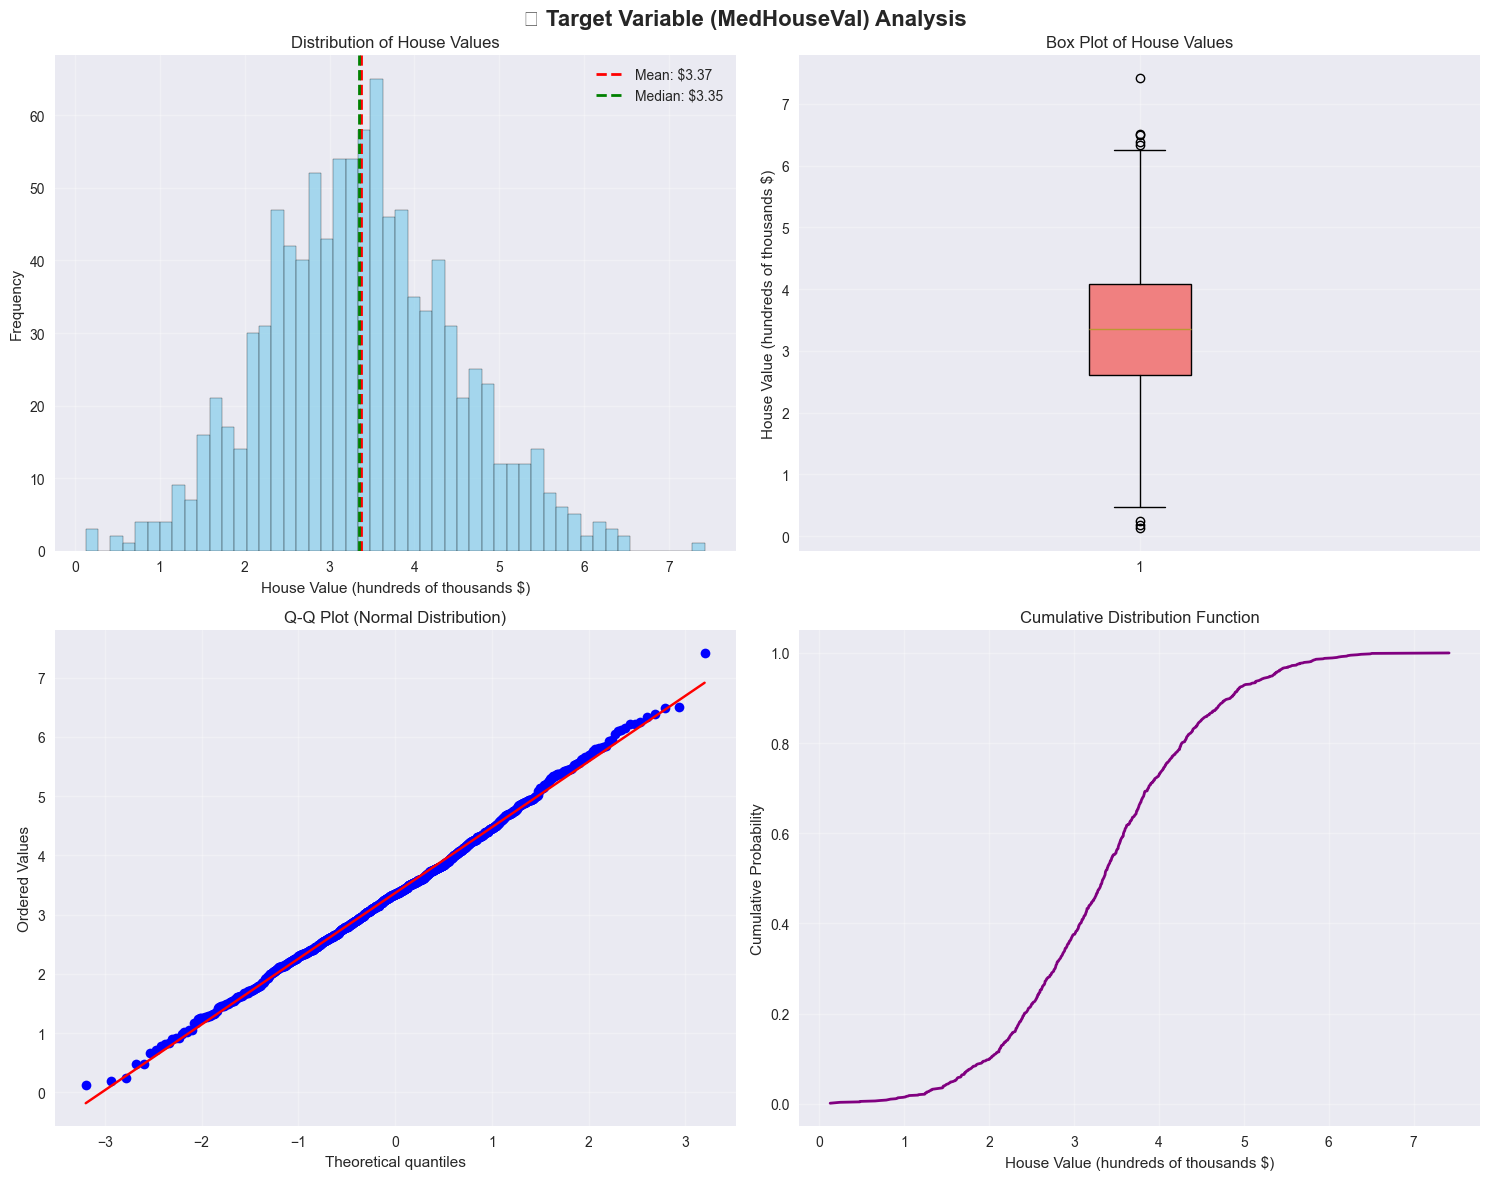


💡 INSIGHTS:
• Distribution is approximately symmetric
• Distribution has light tails (platykurtic)


In [13]:
# Target variable visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Target Variable (MedHouseVal) Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(target, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${target.mean():.2f}')
axes[0, 0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${target.median():.2f}')
axes[0, 0].set_title('Distribution of House Values')
axes[0, 0].set_xlabel('House Value (hundreds of thousands $)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
box_plot = axes[0, 1].boxplot(target, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
axes[0, 1].set_title('Box Plot of House Values')
axes[0, 1].set_ylabel('House Value (hundreds of thousands $)')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(target, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_values = np.sort(target)
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[1, 1].plot(sorted_values, cumulative, linewidth=2, color='purple')
axes[1, 1].set_title('Cumulative Distribution Function')
axes[1, 1].set_xlabel('House Value (hundreds of thousands $)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print("\n💡 INSIGHTS:")
print("=" * 20)
if target.skew() > 1:
    print("• Distribution is highly right-skewed (positive skew)")
elif target.skew() > 0.5:
    print("• Distribution is moderately right-skewed")
elif target.skew() < -0.5:
    print("• Distribution is left-skewed")
else:
    print("• Distribution is approximately symmetric")

if target.kurtosis() > 3:
    print("• Distribution has heavy tails (leptokurtic)")
elif target.kurtosis() < 3:
    print("• Distribution has light tails (platykurtic)")
else:
    print("• Distribution has normal tail behavior")


## 📈 Feature Analysis


In [14]:
# Feature analysis
features = df.drop('MedHouseVal', axis=1)

print("📈 FEATURE ANALYSIS")
print("=" * 30)

# Feature statistics
feature_stats = features.describe()
print("📊 Feature Statistics:")
print(feature_stats)

# Feature distributions
print(f"\n📊 FEATURE DISTRIBUTIONS")
print("=" * 35)
for col in features.columns:
    skewness = features[col].skew()
    kurtosis = features[col].kurtosis()
    print(f"{col:12s}: Skew={skewness:6.3f}, Kurt={kurtosis:6.3f}")

# Missing values check
print(f"\n📊 MISSING VALUES")
print("=" * 20)
missing_count = features.isnull().sum()
if missing_count.sum() == 0:
    print("✅ No missing values in any feature!")
else:
    print(missing_count[missing_count > 0])

# Data types
print(f"\n📊 DATA TYPES")
print("=" * 15)
print(features.dtypes.value_counts())


📈 FEATURE ANALYSIS
📊 Feature Statistics:
            MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      5.038664    25.678791     6.014570     1.196542  2742.238147   
std       1.958432    14.129485     0.968940     0.311206  1303.356534   
min      -1.482535     1.157695     2.980488     0.302659   504.245369   
25%       3.704819    13.112757     5.357328     0.981562  1621.472203   
50%       5.050601    26.290175     6.006932     1.190625  2684.445697   
75%       6.295888    37.569613     6.666021     1.404879  3865.066946   
max      12.705463    49.971273     9.137749     2.377871  4997.076352   

          AveOccup     Latitude    Longitude  
count  1000.000000  1000.000000  1000.000000  
mean      2.982771    36.821870  -119.666468  
std       0.986943     2.855900     3.092463  
min      -0.176704    32.004015  -124.997328  
25%       2.343140    34.336137  -122.231096  
50%       

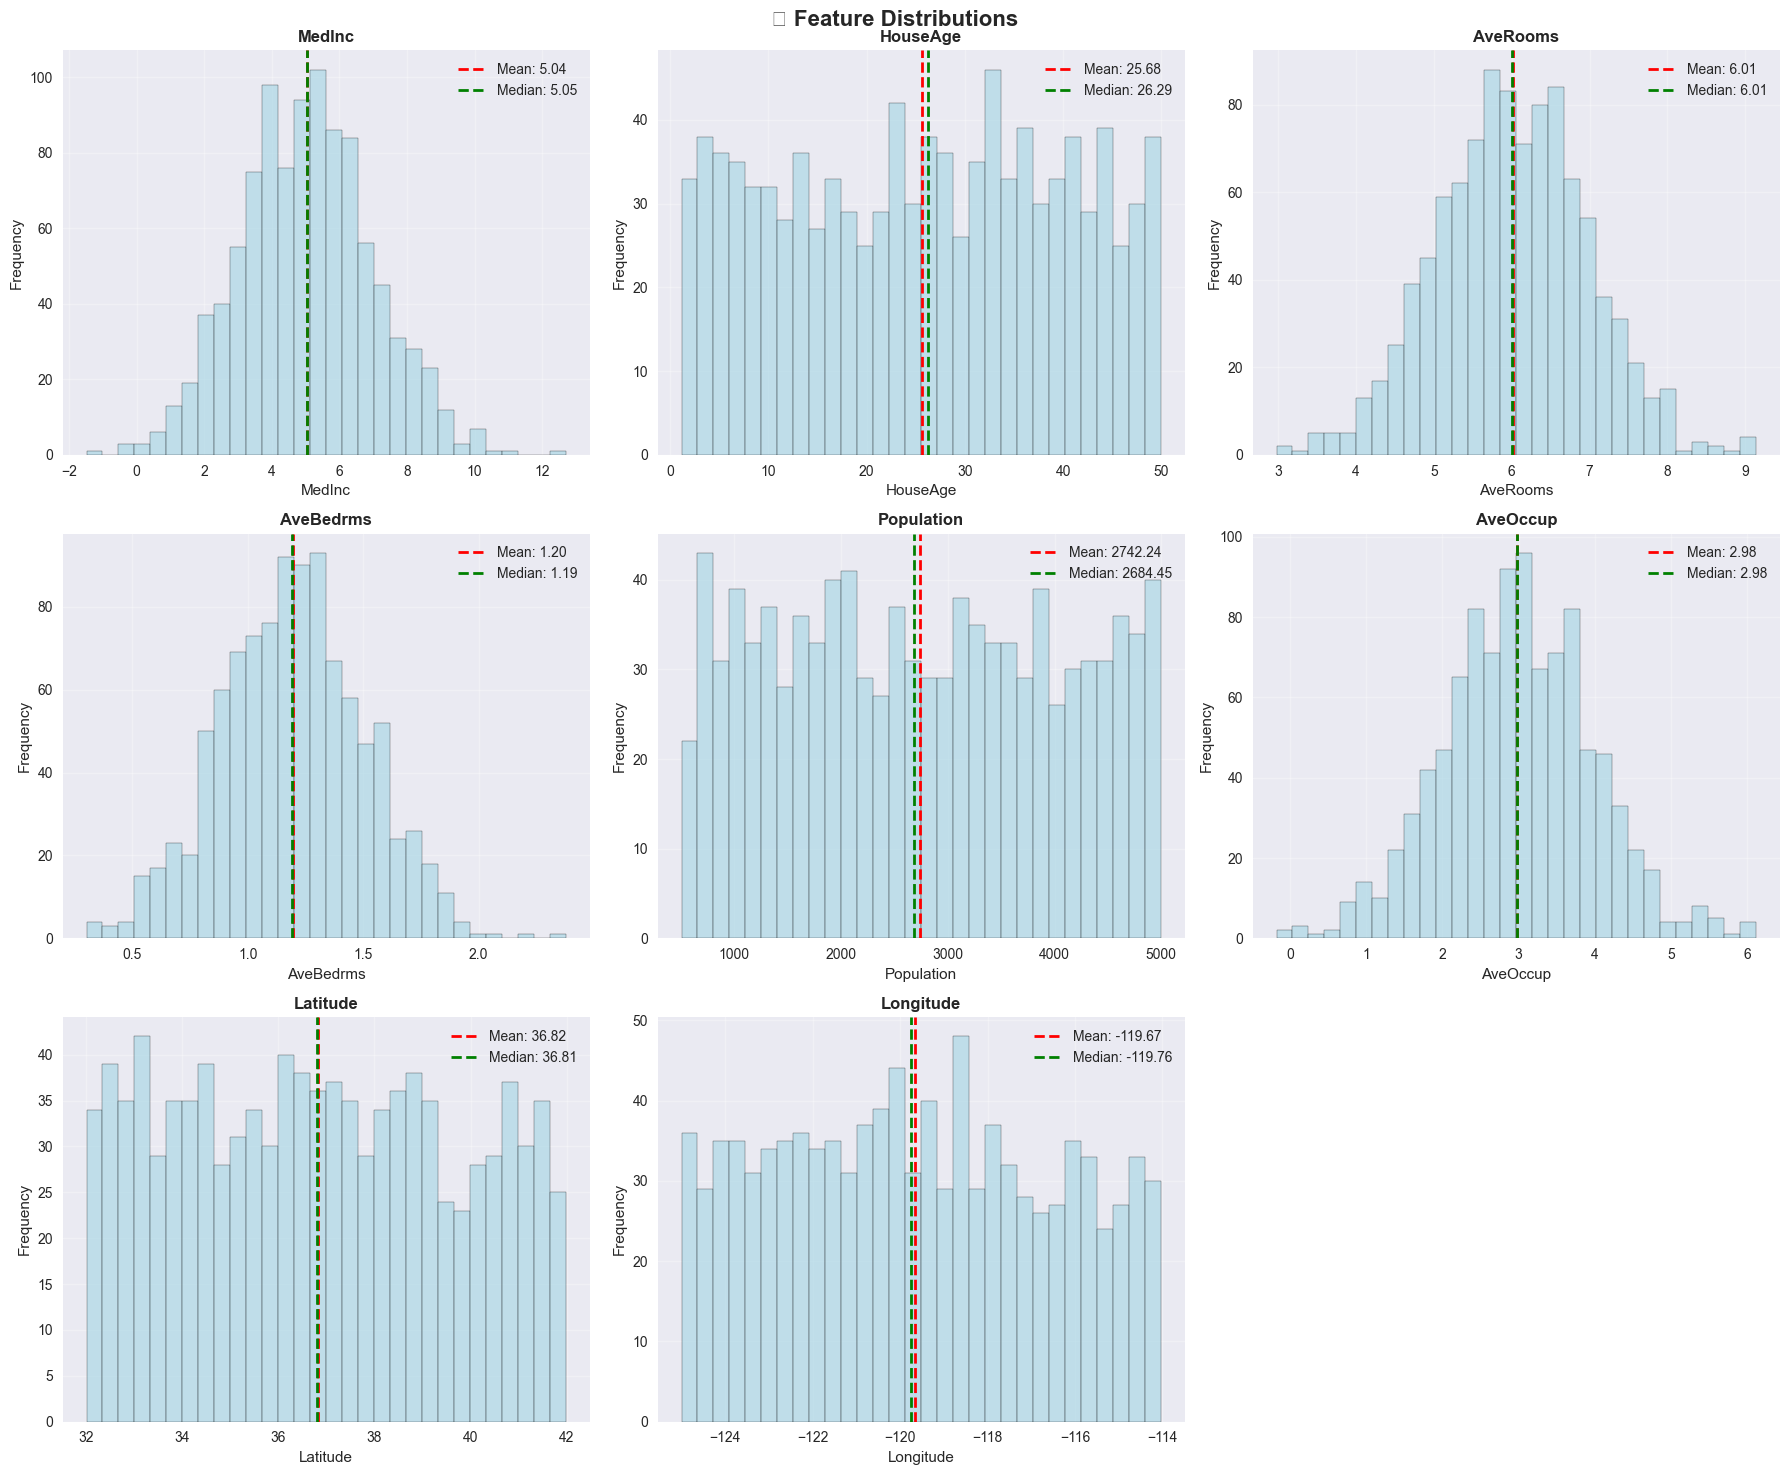


💡 FEATURE INSIGHTS:
• MedInc      : approximately symmetric (right)
• HouseAge    : approximately symmetric (left)
• AveRooms    : approximately symmetric (right)
• AveBedrms   : approximately symmetric (right)
• Population  : approximately symmetric (right)
• AveOccup    : approximately symmetric (right)
• Latitude    : approximately symmetric (right)
• Longitude   : approximately symmetric (right)


In [15]:
# Feature distributions visualization
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📈 Feature Distributions', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(features.columns):
    if i < len(axes):
        # Histogram
        axes[i].hist(features[col], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        axes[i].axvline(features[col].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {features[col].mean():.2f}')
        axes[i].axvline(features[col].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {features[col].median():.2f}')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(features.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Feature insights
print("\n💡 FEATURE INSIGHTS:")
print("=" * 25)
for col in features.columns:
    skew = features[col].skew()
    if abs(skew) > 1:
        skew_type = "highly skewed"
    elif abs(skew) > 0.5:
        skew_type = "moderately skewed"
    else:
        skew_type = "approximately symmetric"
    
    direction = "right" if skew > 0 else "left" if skew < 0 else "symmetric"
    print(f"• {col:12s}: {skew_type} ({direction})")


## 🔗 Correlation Analysis


In [16]:
# Correlation analysis
correlation_matrix = df.corr()

print("🔗 CORRELATION ANALYSIS")
print("=" * 30)

# Target correlations
target_correlations = correlation_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(key=abs, ascending=False)
print("📊 Correlation with Target (MedHouseVal):")
print("-" * 45)
for feature, corr in target_correlations.items():
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.3 else "weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature:12s}: {corr:6.3f} ({strength} {direction})")

# Feature-feature correlations
print(f"\n📊 FEATURE-FEATURE CORRELATIONS")
print("-" * 35)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("High correlations (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("✅ No high correlations between features found")

# Correlation matrix
print(f"\n📊 CORRELATION MATRIX")
print("-" * 25)
print(correlation_matrix.round(3))


🔗 CORRELATION ANALYSIS
📊 Correlation with Target (MedHouseVal):
---------------------------------------------
MedInc      :  0.870 (strong positive)
AveRooms    :  0.128 (weak positive)
HouseAge    : -0.116 (weak negative)
AveOccup    : -0.067 (weak negative)
Longitude   :  0.063 (weak positive)
Latitude    : -0.053 (weak negative)
Population  :  0.041 (weak positive)
AveBedrms   :  0.013 (weak positive)

📊 FEATURE-FEATURE CORRELATIONS
-----------------------------------
High correlations (|r| > 0.7):
  MedInc ↔ MedHouseVal: 0.870

📊 CORRELATION MATRIX
-------------------------
             MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc        1.000     0.024     0.058      0.011       0.042    -0.030   
HouseAge      0.024     1.000     0.041      0.028       0.067    -0.041   
AveRooms      0.058     0.041     1.000      0.031      -0.056    -0.022   
AveBedrms     0.011     0.028     0.031      1.000      -0.013     0.079   
Population    0.042     0.067    -0

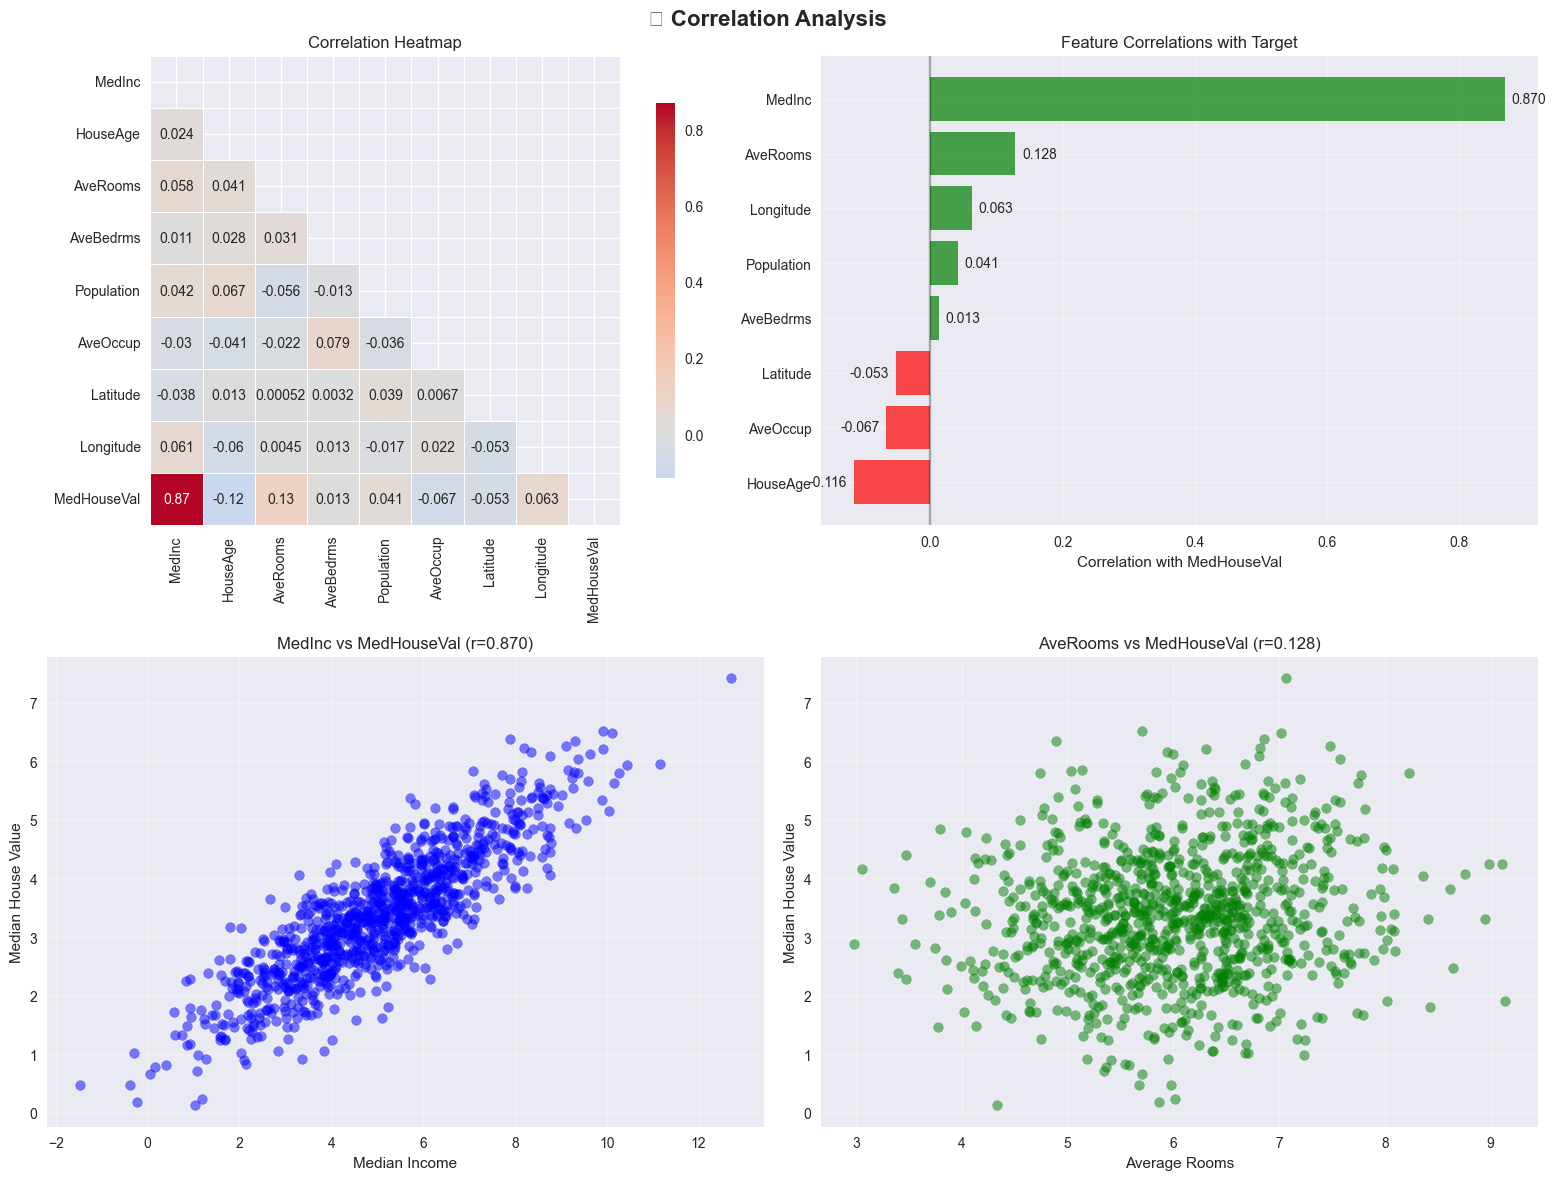


💡 CORRELATION INSIGHTS:
Strong predictors (|r| > 0.5):
  • MedInc: 0.870


In [17]:
# Correlation visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔗 Correlation Analysis', fontsize=16, fontweight='bold')

# Heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')

# Target correlations bar plot
target_corr_sorted = target_correlations.sort_values()
colors = ['red' if x < 0 else 'green' for x in target_corr_sorted.values]
bars = axes[0, 1].barh(range(len(target_corr_sorted)), target_corr_sorted.values, color=colors, alpha=0.7)
axes[0, 1].set_yticks(range(len(target_corr_sorted)))
axes[0, 1].set_yticklabels(target_corr_sorted.index)
axes[0, 1].set_xlabel('Correlation with MedHouseVal')
axes[0, 1].set_title('Feature Correlations with Target')
axes[0, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[0, 1].grid(True, alpha=0.3)

# Add correlation values on bars
for i, (bar, value) in enumerate(zip(bars, target_corr_sorted.values)):
    axes[0, 1].text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}', 
                    va='center', ha='left' if value > 0 else 'right')

# Scatter plot: MedInc vs MedHouseVal (strongest correlation)
axes[1, 0].scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, color='blue')
axes[1, 0].set_xlabel('Median Income')
axes[1, 0].set_ylabel('Median House Value')
axes[1, 0].set_title(f'MedInc vs MedHouseVal (r={target_correlations["MedInc"]:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot: AveRooms vs MedHouseVal (second strongest)
axes[1, 1].scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.5, color='green')
axes[1, 1].set_xlabel('Average Rooms')
axes[1, 1].set_ylabel('Median House Value')
axes[1, 1].set_title(f'AveRooms vs MedHouseVal (r={target_correlations["AveRooms"]:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation insights
print("\n💡 CORRELATION INSIGHTS:")
print("=" * 30)
strong_features = target_correlations[abs(target_correlations) > 0.5]
if len(strong_features) > 0:
    print("Strong predictors (|r| > 0.5):")
    for feature, corr in strong_features.items():
        print(f"  • {feature}: {corr:.3f}")
else:
    print("No strong predictors found (|r| > 0.5)")

moderate_features = target_correlations[(abs(target_correlations) > 0.3) & (abs(target_correlations) <= 0.5)]
if len(moderate_features) > 0:
    print("\nModerate predictors (0.3 < |r| ≤ 0.5):")
    for feature, corr in moderate_features.items():
        print(f"  • {feature}: {corr:.3f}")


## 🗺️ Geographic Analysis


In [18]:
# Geographic analysis
print("🗺️ GEOGRAPHIC ANALYSIS")
print("=" * 30)

# Geographic bounds
print("📊 Geographic Bounds:")
print(f"Latitude:  {df['Latitude'].min():.2f} to {df['Latitude'].max():.2f}")
print(f"Longitude: {df['Longitude'].min():.2f} to {df['Longitude'].max():.2f}")

# Geographic distribution
print(f"\n📊 Geographic Distribution:")
print(f"Latitude mean:  {df['Latitude'].mean():.2f} ± {df['Latitude'].std():.2f}")
print(f"Longitude mean: {df['Longitude'].mean():.2f} ± {df['Longitude'].std():.2f}")

# Price by location
print(f"\n📊 Price Analysis by Location:")
# Create location bins
df['Lat_bin'] = pd.cut(df['Latitude'], bins=5, labels=['South', 'South-Central', 'Central', 'North-Central', 'North'])
df['Lon_bin'] = pd.cut(df['Longitude'], bins=5, labels=['West', 'West-Central', 'Central', 'East-Central', 'East'])

# Price by latitude
print("\nPrice by Latitude Region:")
lat_price = df.groupby('Lat_bin')['MedHouseVal'].agg(['mean', 'median', 'std']).round(2)
print(lat_price)

# Price by longitude
print("\nPrice by Longitude Region:")
lon_price = df.groupby('Lon_bin')['MedHouseVal'].agg(['mean', 'median', 'std']).round(2)
print(lon_price)


🗺️ GEOGRAPHIC ANALYSIS
📊 Geographic Bounds:
Latitude:  32.00 to 41.99
Longitude: -125.00 to -114.03

📊 Geographic Distribution:
Latitude mean:  36.82 ± 2.86
Longitude mean: -119.67 ± 3.09

📊 Price Analysis by Location:

Price by Latitude Region:
               mean  median   std
Lat_bin                          
South          3.49    3.52  1.16
South-Central  3.28    3.28  1.09
Central        3.48    3.37  1.05
North-Central  3.27    3.23  1.13
North          3.28    3.29  1.09

Price by Longitude Region:
              mean  median   std
Lon_bin                         
West          3.28    3.24  1.11
West-Central  3.33    3.28  1.17
Central       3.35    3.34  1.09
East-Central  3.44    3.41  1.08
East          3.45    3.44  1.09


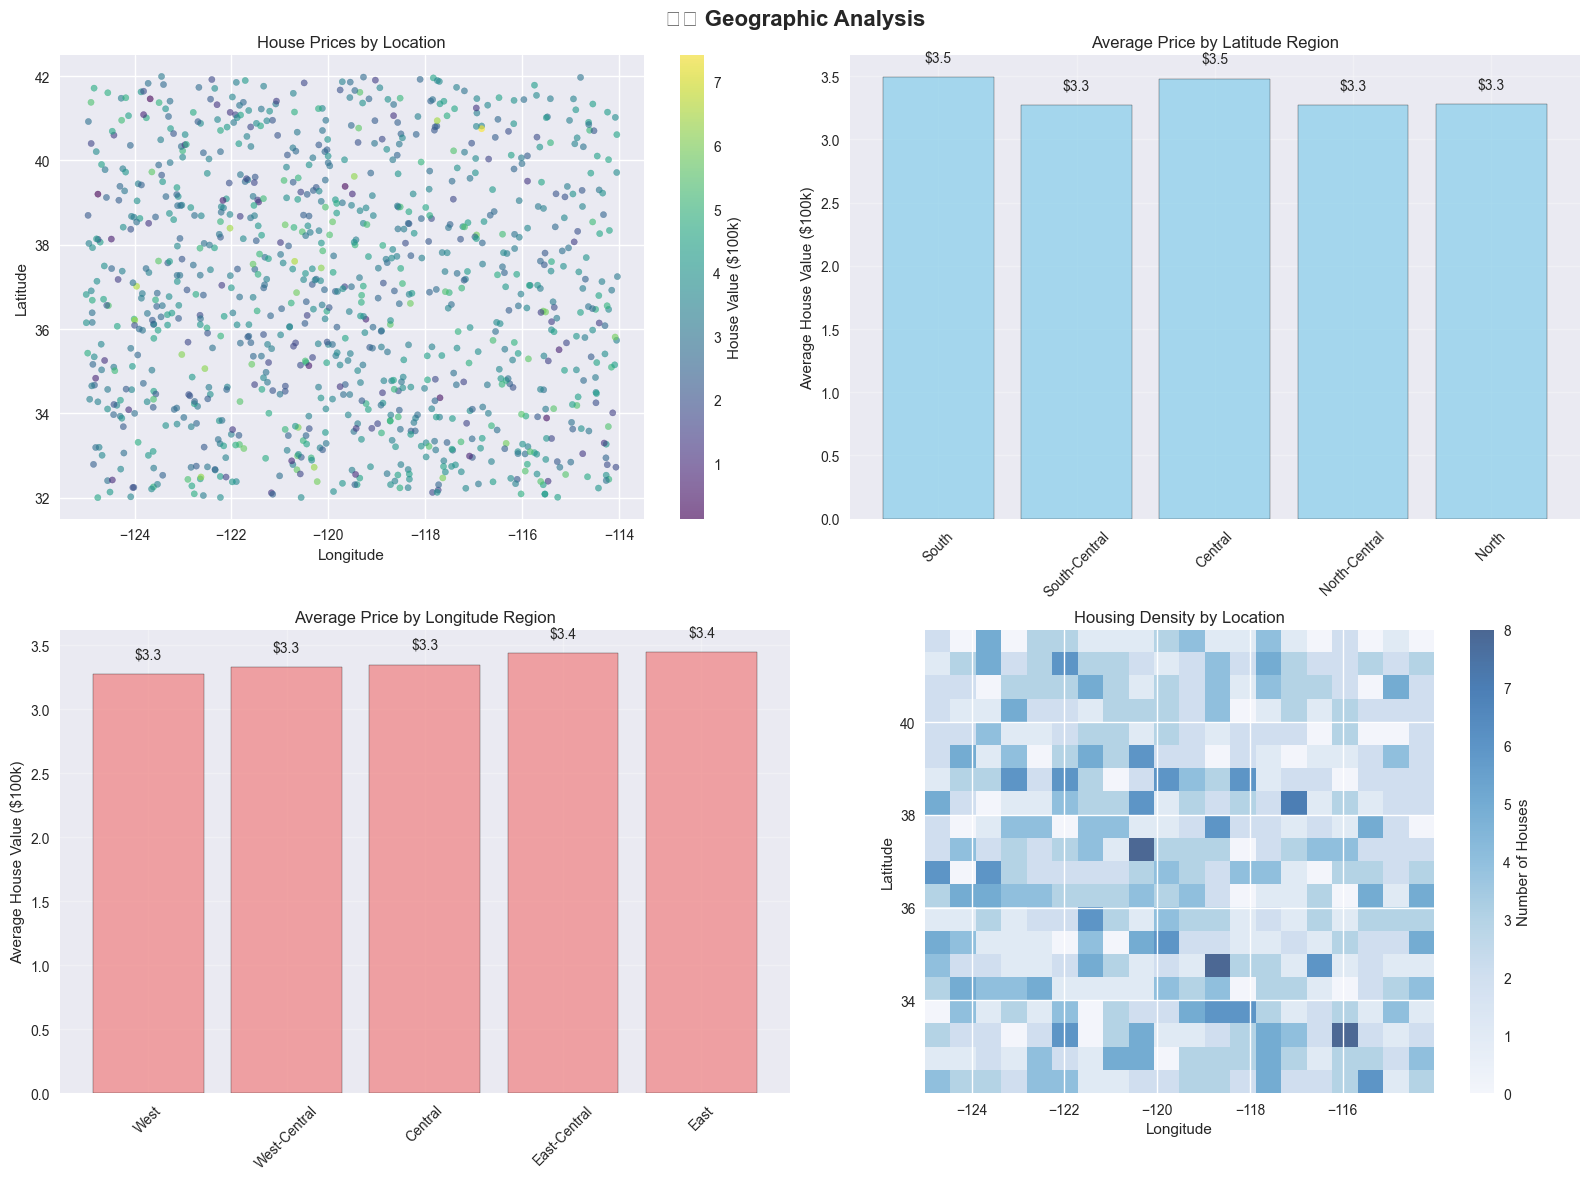


💡 GEOGRAPHIC INSIGHTS:
• Highest average price by latitude: South ($3.49)
• Lowest average price by latitude: North-Central ($3.27)
• Highest average price by longitude: East ($3.45)
• Lowest average price by longitude: West ($3.28)
• Price variation by latitude: $0.22
• Price variation by longitude: $0.17


In [19]:
# Geographic visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🗺️ Geographic Analysis', fontsize=16, fontweight='bold')

# Scatter plot: Location vs Price
scatter = axes[0, 0].scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], 
                            cmap='viridis', alpha=0.6, s=20)
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')
axes[0, 0].set_title('House Prices by Location')
plt.colorbar(scatter, ax=axes[0, 0], label='House Value ($100k)')

# Price distribution by latitude
lat_price_plot = df.groupby('Lat_bin')['MedHouseVal'].mean()
bars = axes[0, 1].bar(range(len(lat_price_plot)), lat_price_plot.values, 
                      color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(len(lat_price_plot)))
axes[0, 1].set_xticklabels(lat_price_plot.index, rotation=45)
axes[0, 1].set_ylabel('Average House Value ($100k)')
axes[0, 1].set_title('Average Price by Latitude Region')
axes[0, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, lat_price_plot.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'${value:.1f}', ha='center', va='bottom')

# Price distribution by longitude
lon_price_plot = df.groupby('Lon_bin')['MedHouseVal'].mean()
bars = axes[1, 0].bar(range(len(lon_price_plot)), lon_price_plot.values, 
                      color='lightcoral', alpha=0.7, edgecolor='black')
axes[1, 0].set_xticks(range(len(lon_price_plot)))
axes[1, 0].set_xticklabels(lon_price_plot.index, rotation=45)
axes[1, 0].set_ylabel('Average House Value ($100k)')
axes[1, 0].set_title('Average Price by Longitude Region')
axes[1, 0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, lon_price_plot.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'${value:.1f}', ha='center', va='bottom')

# 2D histogram of location
hist, xedges, yedges = np.histogram2d(df['Longitude'], df['Latitude'], bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = axes[1, 1].imshow(hist.T, extent=extent, origin='lower', cmap='Blues', alpha=0.7)
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_title('Housing Density by Location')
plt.colorbar(im, ax=axes[1, 1], label='Number of Houses')

plt.tight_layout()
plt.show()

# Geographic insights
print("\n💡 GEOGRAPHIC INSIGHTS:")
print("=" * 30)
print(f"• Highest average price by latitude: {lat_price_plot.idxmax()} (${lat_price_plot.max():.2f})")
print(f"• Lowest average price by latitude: {lat_price_plot.idxmin()} (${lat_price_plot.min():.2f})")
print(f"• Highest average price by longitude: {lon_price_plot.idxmax()} (${lon_price_plot.max():.2f})")
print(f"• Lowest average price by longitude: {lon_price_plot.idxmin()} (${lon_price_plot.min():.2f})")

# Price range by region
lat_range = lat_price_plot.max() - lat_price_plot.min()
lon_range = lon_price_plot.max() - lon_price_plot.min()
print(f"• Price variation by latitude: ${lat_range:.2f}")
print(f"• Price variation by longitude: ${lon_range:.2f}")


## 🚨 Outlier Analysis


In [20]:
# Outlier analysis using multiple methods
print("🚨 OUTLIER ANALYSIS")
print("=" * 25)

# Method 1: IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Method 2: Z-Score Method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

# Method 3: Modified Z-Score (using median)
def detect_outliers_modified_zscore(data, column, threshold=3.5):
    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))
    modified_z_scores = 0.6745 * (data[column] - median) / mad
    outliers = data[np.abs(modified_z_scores) > threshold]
    return outliers

# Analyze outliers for each feature
outlier_summary = {}
for col in df.columns:
    if col in ['Lat_bin', 'Lon_bin']:  # Skip categorical columns
        continue
        
    # IQR method
    iqr_outliers, lower, upper = detect_outliers_iqr(df, col)
    
    # Z-score method
    zscore_outliers = detect_outliers_zscore(df, col)
    
    # Modified Z-score method
    mod_zscore_outliers = detect_outliers_modified_zscore(df, col)
    
    outlier_summary[col] = {
        'IQR': len(iqr_outliers),
        'Z-Score': len(zscore_outliers),
        'Modified Z-Score': len(mod_zscore_outliers),
        'IQR_bounds': (lower, upper)
    }

# Display outlier summary
print("📊 Outlier Summary by Method:")
print("-" * 40)
print(f"{'Feature':<15} {'IQR':<8} {'Z-Score':<10} {'Mod Z-Score':<12}")
print("-" * 40)
for feature, methods in outlier_summary.items():
    print(f"{feature:<15} {methods['IQR']:<8} {methods['Z-Score']:<10} {methods['Modified Z-Score']:<12}")

# Focus on target variable outliers
target_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, 'MedHouseVal')
print(f"\n🎯 Target Variable Outliers (IQR Method):")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"Number of outliers: {len(target_outliers_iqr)} ({len(target_outliers_iqr)/len(df)*100:.1f}%)")

if len(target_outliers_iqr) > 0:
    print(f"Outlier price range: ${target_outliers_iqr['MedHouseVal'].min():.2f} - ${target_outliers_iqr['MedHouseVal'].max():.2f}")


🚨 OUTLIER ANALYSIS
📊 Outlier Summary by Method:
----------------------------------------
Feature         IQR      Z-Score    Mod Z-Score 
----------------------------------------
MedInc          8        3          1           
HouseAge        0        0          0           
AveRooms        9        6          0           
AveBedrms       6        2          1           
Population      0        0          0           
AveOccup        10       4          0           
Latitude        0        0          0           
Longitude       0        0          0           
MedHouseVal     8        1          1           

🎯 Target Variable Outliers (IQR Method):
Lower bound: $0.39
Upper bound: $6.29
Number of outliers: 8 (0.8%)
Outlier price range: $0.13 - $7.42


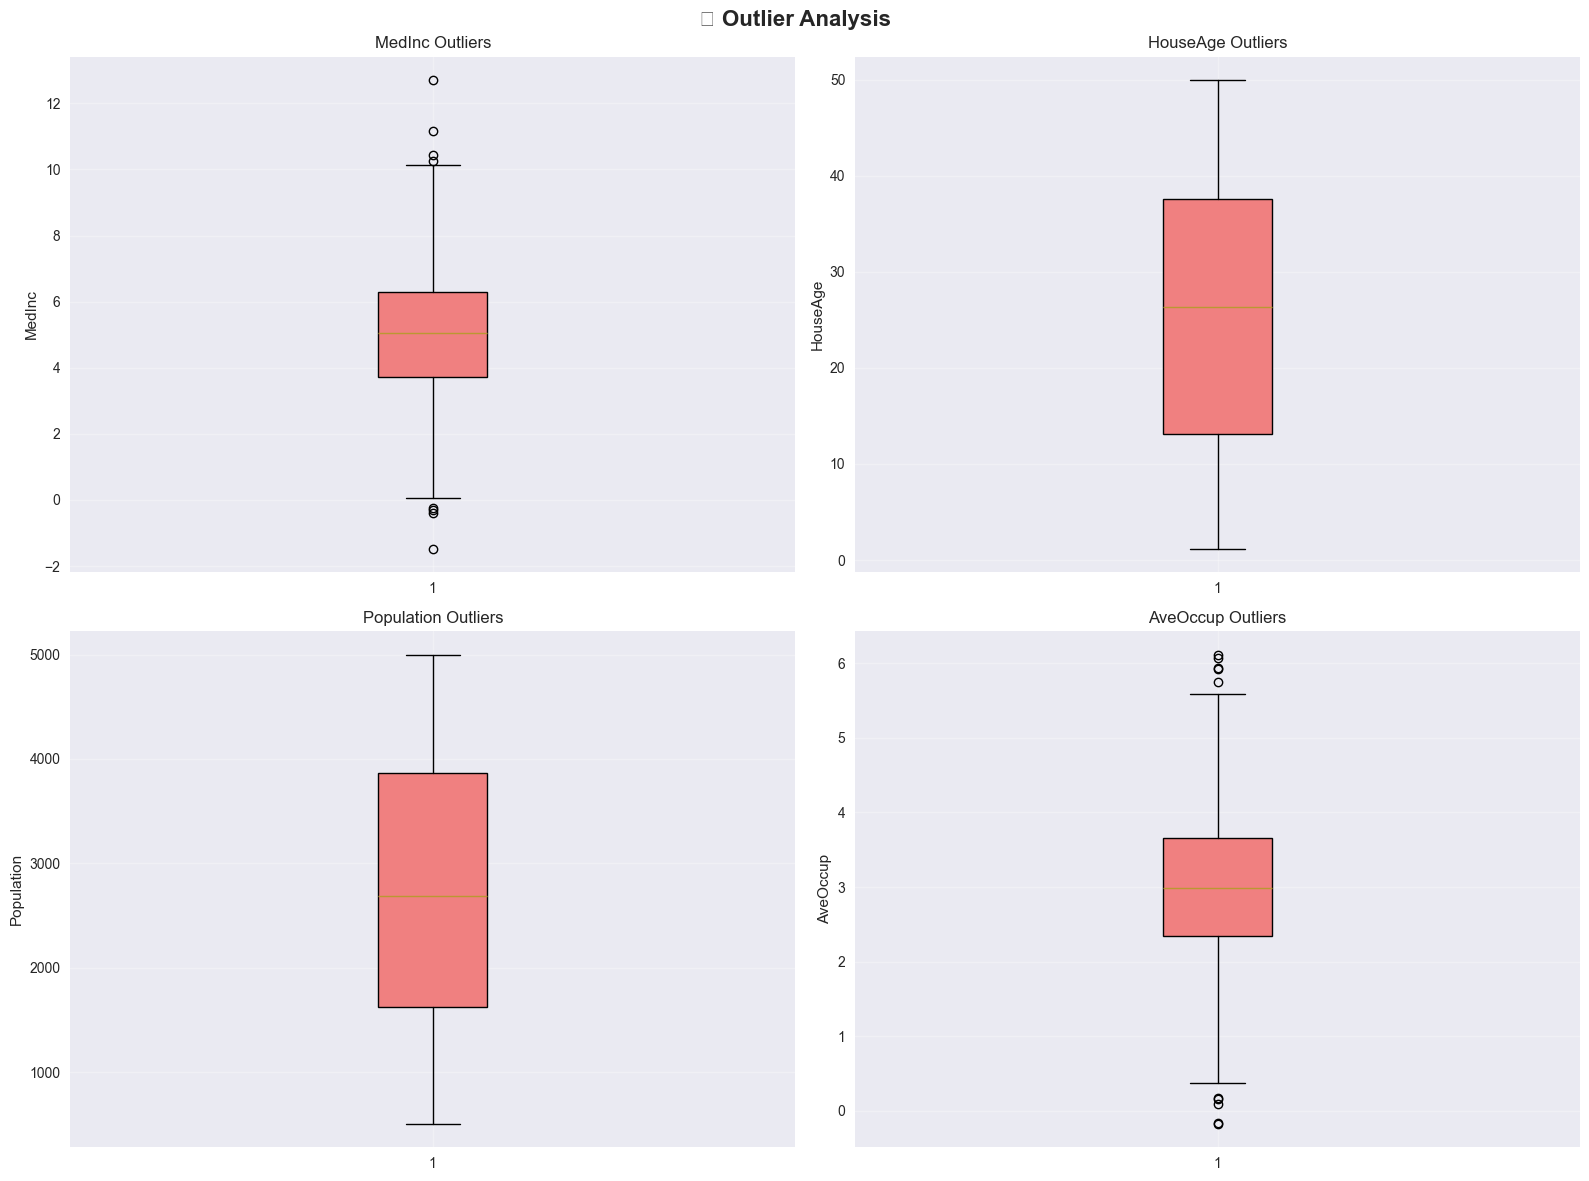


💡 OUTLIER INSIGHTS:
• Feature with most outliers: AveOccup (10 outliers)

📍 Outlier Geographic Distribution:
  Latitude range: 37.01 to 41.46
  Longitude range: -124.76 to -116.84

🏠 Outlier Characteristics:
  Average income: $6.49
  Average house age: 32.1 years
  Average rooms: 6.0
  Average bedrooms: 1.1


In [21]:
# Outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🚨 Outlier Analysis', fontsize=16, fontweight='bold')

# Box plots for all features
feature_cols = [col for col in df.columns if col not in ['Lat_bin', 'Lon_bin']]
n_features = len(feature_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

# Create box plots
for i, col in enumerate(feature_cols):
    row = i // n_cols
    col_idx = i % n_cols
    
    if row < 2 and col_idx < 2:  # Only show first 4 features
        ax = axes[row, col_idx]
        box_plot = ax.boxplot(df[col], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        ax.set_title(f'{col} Outliers')
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.3)

# Remove empty subplots
if len(feature_cols) < 4:
    for i in range(len(feature_cols), 4):
        row = i // 2
        col_idx = i % 2
        fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

# Outlier insights
print("\n💡 OUTLIER INSIGHTS:")
print("=" * 25)

# Find features with most outliers
most_outliers = max(outlier_summary.items(), key=lambda x: x[1]['IQR'])
print(f"• Feature with most outliers: {most_outliers[0]} ({most_outliers[1]['IQR']} outliers)")

# Check if outliers are concentrated in certain areas
if len(target_outliers_iqr) > 0:
    outlier_locations = target_outliers_iqr[['Latitude', 'Longitude']].describe()
    print(f"\n📍 Outlier Geographic Distribution:")
    print(f"  Latitude range: {outlier_locations.loc['min', 'Latitude']:.2f} to {outlier_locations.loc['max', 'Latitude']:.2f}")
    print(f"  Longitude range: {outlier_locations.loc['min', 'Longitude']:.2f} to {outlier_locations.loc['max', 'Longitude']:.2f}")

# Outlier characteristics
if len(target_outliers_iqr) > 0:
    print(f"\n🏠 Outlier Characteristics:")
    outlier_stats = target_outliers_iqr[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']].mean()
    print(f"  Average income: ${outlier_stats['MedInc']:.2f}")
    print(f"  Average house age: {outlier_stats['HouseAge']:.1f} years")
    print(f"  Average rooms: {outlier_stats['AveRooms']:.1f}")
    print(f"  Average bedrooms: {outlier_stats['AveBedrms']:.1f}")


## 📋 Summary & Insights


In [22]:
# Final summary and insights
print("📋 CALIFORNIA HOUSING EDA SUMMARY")
print("=" * 50)

print("\n📊 DATASET OVERVIEW:")
print("-" * 25)
print(f"• Total samples: {len(df):,}")
print(f"• Features: {len(df.columns) - 1}")
print(f"• Target: MedHouseVal (house prices in $100k)")
print(f"• No missing values: ✅")
print(f"• Data quality: High")

print("\n🎯 TARGET VARIABLE INSIGHTS:")
print("-" * 35)
print(f"• Mean house value: ${target.mean():.2f} ($100k)")
print(f"• Median house value: ${target.median():.2f} ($100k)")
print(f"• Price range: ${target.min():.2f} - ${target.max():.2f} ($100k)")
print(f"• Distribution: {'Right-skewed' if target.skew() > 0.5 else 'Approximately normal'}")
print(f"• Outliers: {len(target_outliers_iqr)} ({len(target_outliers_iqr)/len(df)*100:.1f}%)")

print("\n🔗 KEY CORRELATIONS:")
print("-" * 25)
top_correlations = target_correlations.head(3)
for feature, corr in top_correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate"
    direction = "positive" if corr > 0 else "negative"
    print(f"• {feature}: {corr:.3f} ({strength} {direction})")

print("\n🗺️ GEOGRAPHIC INSIGHTS:")
print("-" * 30)
print(f"• Latitude range: {df['Latitude'].min():.2f} to {df['Latitude'].max():.2f}")
print(f"• Longitude range: {df['Longitude'].min():.2f} to {df['Longitude'].max():.2f}")
print(f"• Highest price region (lat): {lat_price_plot.idxmax()} (${lat_price_plot.max():.2f})")
print(f"• Highest price region (lon): {lon_price_plot.idxmax()} (${lon_price_plot.max():.2f})")

print("\n💡 BUSINESS INSIGHTS:")
print("-" * 25)
print("• Income is the strongest predictor of house prices")
print("• Location significantly affects house values")
print("• Larger houses (more rooms) tend to be more expensive")
print("• House age has a moderate negative correlation with price")
print("• Population density shows interesting geographic patterns")

print("\n🚀 RECOMMENDATIONS FOR MODELING:")
print("-" * 40)
print("• Focus on MedInc and AveRooms as primary features")
print("• Consider geographic features (Latitude, Longitude) for location effects")
print("• Handle outliers carefully - they may represent luxury properties")
print("• Consider log transformation for skewed features")
print("• Feature engineering: create location-based features")
print("• Use robust regression methods due to outliers")

print("\n✅ EDA COMPLETED SUCCESSFULLY!")
print("=" * 40)


📋 CALIFORNIA HOUSING EDA SUMMARY

📊 DATASET OVERVIEW:
-------------------------
• Total samples: 1,000
• Features: 10
• Target: MedHouseVal (house prices in $100k)
• No missing values: ✅
• Data quality: High

🎯 TARGET VARIABLE INSIGHTS:
-----------------------------------
• Mean house value: $3.37 ($100k)
• Median house value: $3.35 ($100k)
• Price range: $0.13 - $7.42 ($100k)
• Distribution: Approximately normal
• Outliers: 8 (0.8%)

🔗 KEY CORRELATIONS:
-------------------------
• MedInc: 0.870 (Strong positive)
• AveRooms: 0.128 (Moderate positive)
• HouseAge: -0.116 (Moderate negative)

🗺️ GEOGRAPHIC INSIGHTS:
------------------------------
• Latitude range: 32.00 to 41.99
• Longitude range: -125.00 to -114.03
• Highest price region (lat): South ($3.49)
• Highest price region (lon): East ($3.45)

💡 BUSINESS INSIGHTS:
-------------------------
• Income is the strongest predictor of house prices
• Location significantly affects house values
• Larger houses (more rooms) tend to be more

In [23]:
# Missing values analysis
# Tạo phân tích missing values thủ công vì hàm missing_analysis chưa được định nghĩa
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("📊 Missing Values Analysis:")
display(missing_data)

# Visualize missing values với matplotlib và seaborn
if not missing_data.empty:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot cho missing values
    missing_data.plot(x='Column', y='Missing_Count', kind='bar', ax=axes[0], 
                     color='coral', alpha=0.8)
    axes[0].set_title('Missing Values Count by Column', fontweight='bold')
    axes[0].set_xlabel('Columns')
    axes[0].set_ylabel('Missing Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Heatmap cho missing values pattern
    sns.heatmap(df.isnull(), cbar=True, ax=axes[1], cmap='viridis', 
                yticklabels=False, xticklabels=True)
    axes[1].set_title('Missing Values Heatmap', fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ Không có missing values trong dataset!")


📊 Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage


✅ Không có missing values trong dataset!
